In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os

In [2]:
cwd = os.getcwd()
# print(cwd)

In [3]:
data = pd.read_csv("The Seattle Police Department (SPD) Crime Data.csv")
data.head(2)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118


In [4]:
data.shape #almost a millions rows to start with before cleaning and imputation 

(979713, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979713 entries, 0 to 979712
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           979713 non-null  object 
 1   Offense ID              979713 non-null  int64  
 2   Offense Start DateTime  978708 non-null  object 
 3   Offense End DateTime    543406 non-null  object 
 4   Report DateTime         979713 non-null  object 
 5   Group A B               979713 non-null  object 
 6   Crime Against Category  979713 non-null  object 
 7   Offense Parent Group    979713 non-null  object 
 8   Offense                 979713 non-null  object 
 9   Offense Code            979713 non-null  object 
 10  Precinct                979709 non-null  object 
 11  Sector                  979711 non-null  object 
 12  Beat                    979711 non-null  object 
 13  MCPP                    979713 non-null  object 
 14  100 Block Address   

In [ ]:
# !pip install pandas_profiling
# from pandas_profiling import ProfileReport

# profile = ProfileReport(data, title="Police Report: Pandas Profiling Report", explorative=True)
# profile
# profile.to_widgets()

In [9]:
data.isnull().sum().sort_values(ascending=False) 

Offense End DateTime      436307
100 Block Address          39611
Offense Start DateTime      1005
Precinct                       4
Beat                           2
Sector                         2
Report Number                  0
Longitude                      0
MCPP                           0
Offense                        0
Offense Code                   0
Offense ID                     0
Offense Parent Group           0
Crime Against Category         0
Group A B                      0
Report DateTime                0
Latitude                       0
dtype: int64

In [12]:
round(data[data['Offense End DateTime'].isnull()].shape[0] / data.shape[0] * 100, 2)
#nearly 45% of all Offense End DateTime values are NaN

44.53

In [ ]:
# there are 39611 incidents without an address - remove 
# same goes for any other missing data, like Start DateTime 
# there is no way to get an accurate Start DateTime

In [13]:
data.drop(['Offense End DateTime'], axis = 1, inplace = True) # removing column from dataframe
data.dropna(axis=0, inplace=True) # dropping remaining values that are NaN
data.isnull().sum()

Report Number             0
Offense ID                0
Offense Start DateTime    0
Report DateTime           0
Group A B                 0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
Offense Code              0
Precinct                  0
Sector                    0
Beat                      0
MCPP                      0
100 Block Address         0
Longitude                 0
Latitude                  0
dtype: int64

In [15]:
data.duplicated().sum() # there are no duplicates present in the dataset 

0

In [14]:
data.columns = data.columns.str.replace(" ", "_").str.lower() #formatting column names 

In [16]:
data.head(2)

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118


#### Data Wrangling / Cleaning

Date and Time Adjustments

In [18]:
data['offense_date'] = data['offense_start_datetime'].apply(lambda x: x.split(" ")[0])
data['offense_time'] = data['offense_start_datetime'].apply(lambda x: x.split(" ")[1])

In [19]:
data['offense_date'] = pd.to_datetime(data.offense_date)
data['offense_month'] = data.offense_date.dt.month_name()
data['offense_dow'] = data.offense_date.dt.day_name()
data['offense_day_no'] = data.offense_date.dt.day_of_week

In [21]:
def convert_to_24_hours(time): 
    if "PM" in time: 
        time = int(time.split(":")[0]) + 12 
    else: 
        time = int(time.split(":")[0])
    return time

In [22]:
#hour of crime is denoted by AM and PM, so I'll have to change how I thought I was going to approach this
data['offense_hour'] = data['offense_time'].apply(lambda x: x.split(":")[0])

data['offense_hour'] = data['offense_start_datetime'].apply(lambda x: x.split(" ")[1:])
data['offense_hour'] = data['offense_hour'].apply(lambda x: " ".join(x))

data['offense_hour_test'] = data['offense_hour'].apply(lambda x: convert_to_24_hours(x))

In [23]:
data.head(2) #new date and time columns have been added to dataframe 

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,...,100_block_address,longitude,latitude,offense_date,offense_time,offense_month,offense_dow,offense_day_no,offense_hour,offense_hour_test
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,...,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020-02-05,10:10:00,February,Wednesday,2,10:10:00 AM,10
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,...,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020-02-03,08:00:00,February,Monday,0,08:00:00 AM,8


Street Address Adjustments

In [25]:
data["100_block_address"] = data["100_block_address"].apply(lambda x: x.replace("XX", "00"))
#replacing all blocked out address with "00" number of block in order to have more accurate location

data["street_address"] = data["100_block_address"].apply(lambda x: x.replace("BLOCK OF", ""))

In [42]:
data.offense_dow.value_counts().items

<bound method Series.items of Friday       145370
Saturday     137055
Thursday     133055
Wednesday    132852
Monday       132615
Tuesday      131734
Sunday       126569
Name: offense_dow, dtype: int64>

#### Exploratory Data Analysis 

Text(0.5, 1.0, 'Distribution of Crime by Day of Week')

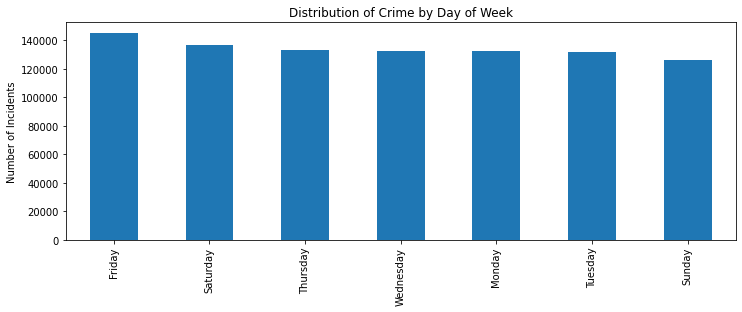

In [46]:
DAYS_OF_WEEK = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

data.offense_dow.value_counts().plot(kind="bar", figsize=(12, 4))
# plt.xticks(range(len(DAYS_OF_WEEK)), DAYS_OF_WEEK, rotation=45,ha="right")
plt.ylabel("Number of Incidents")
plt.title("Distribution of Crime by Day of Week")


Text(0.5, 1.0, 'Distribution of Crime by Month')

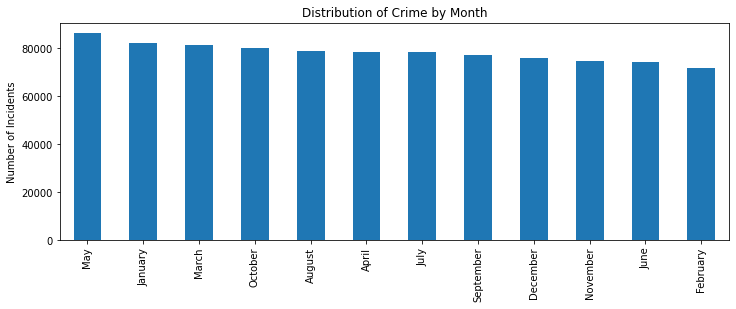

In [47]:
MONTHS = ["January", "February", "March", "April", "May", "June", "July", 
         "August", "September", "October", "November", "December"]

data.offense_month.value_counts().plot(kind="bar", figsize=(12, 4))
# plt.xticks(range(len(MONTHS)), MONTHS, rotation=45,ha="right")
plt.ylabel("Number of Incidents")
plt.title("Distribution of Crime by Month")

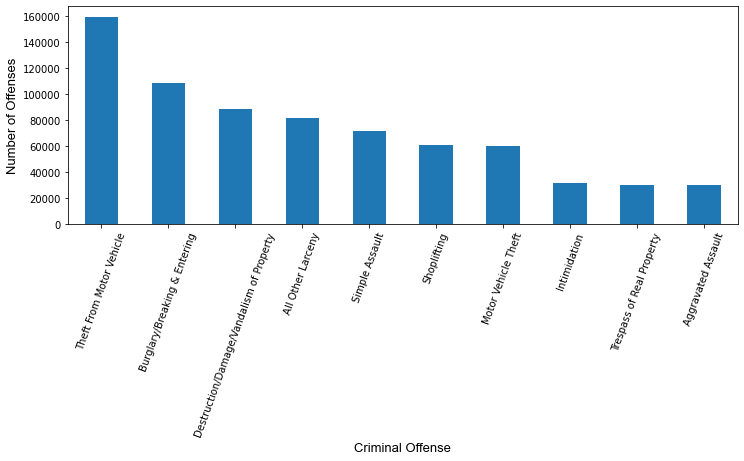

In [28]:
data.offense.value_counts()[:10].plot(kind="bar", figsize=(12, 4))
plt.xticks(rotation=70)
plt.xlabel("Criminal Offense", {"font":"Arial", "fontsize":13, "fontweight":"medium"})
plt.ylabel("Number of Offenses", {"font":"Arial", "fontsize":13, "fontweight":"medium"});

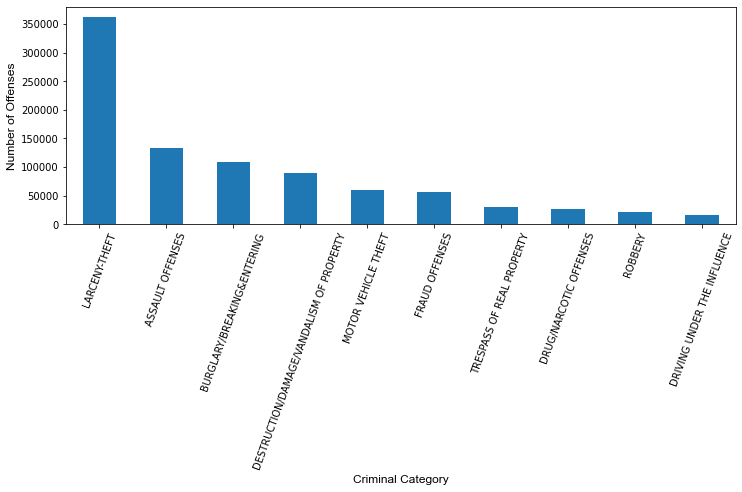

In [50]:
data.offense_parent_group.value_counts()[:10].plot(kind="bar", figsize=(12, 4)) #
plt.xticks(rotation=70)
plt.xlabel("Criminal Category", {"font":"Arial", "fontsize":12, "fontweight":"medium"})
plt.ylabel("Number of Offenses", {"font":"Arial", "fontsize":12, "fontweight":"medium"});

Text(0, 0.5, 'Number of Incidents')

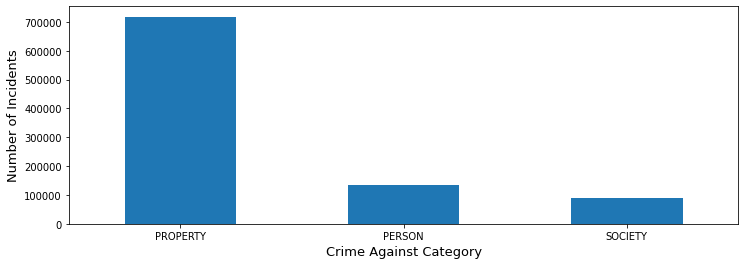

In [52]:
data.crime_against_category.value_counts().plot(kind="bar", figsize=(12, 4))
plt.xticks(rotation=0)
plt.xlabel("Crime Against Category", fontsize=13)
plt.ylabel("Number of Incidents", fontsize=13)

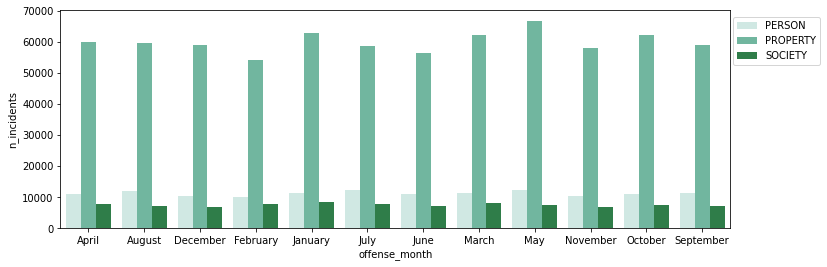

In [53]:
fig, ax = plt.subplots(figsize=(12, 4))
group1 = data.groupby(['offense_month', 'crime_against_category']).size().to_frame("n_incidents").reset_index()
# group1['incident_rank'] = group1.n_incidents
# group1[group1['incident_rank'] <= 10]
sns.barplot(data=group1, x='offense_month', y='n_incidents', hue='crime_against_category', palette="BuGn")
ax.legend(loc=(1.005, .75))

(0.0, 24.0)

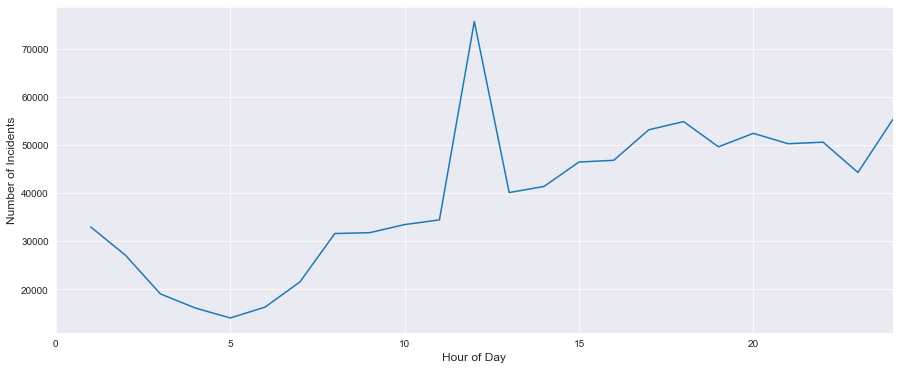

In [54]:
hour_group = data.groupby('offense_hour_test').size().to_frame('n_incidents').reset_index()

plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')
sns.lineplot(data=hour_group, x='offense_hour_test', y='n_incidents')

plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xlim(0, 24)

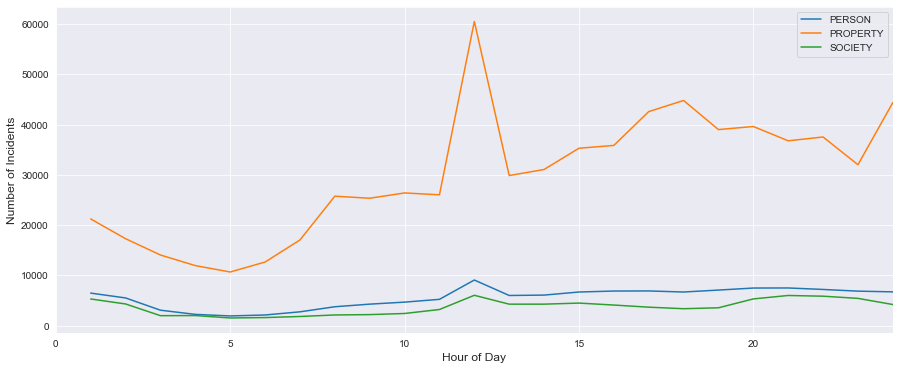

In [55]:
hour_cat_group = data.groupby(['offense_hour_test', 'crime_against_category']).size().to_frame('n_incidents').reset_index()
plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')
sns.lineplot(data=hour_cat_group, x='offense_hour_test', y='n_incidents', hue='crime_against_category')

plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xlim(0, 24)

plt.legend(fontsize=10, fancybox=True)

In [58]:
data.head(2)

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,...,longitude,latitude,offense_date,offense_time,offense_month,offense_dow,offense_day_no,offense_hour,offense_hour_test,street_address
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,...,-122.385974,47.649387,2020-02-05,10:10:00,February,Wednesday,2,10:10:00 AM,10,3200 23RD AVE W
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,...,-122.323399,47.675118,2020-02-03,08:00:00,February,Monday,0,08:00:00 AM,8,6300 5TH AVE NE


In [57]:
data.iloc[2, 10:]

sector                                          U
beat                                           U3
mcpp                            ROOSEVELT/RAVENNA
100_block_address    26TH AVE NE / NE BLAKELEY ST
longitude                             -122.299552
latitude                                47.666384
offense_date                  2020-02-02 00:00:00
offense_time                             08:30:00
offense_month                            February
offense_dow                                Sunday
offense_day_no                                  6
offense_hour                          08:30:00 PM
offense_hour_test                              20
street_address       26TH AVE NE / NE BLAKELEY ST
Name: 2, dtype: object

In [56]:
data.mcpp.value_counts()[:5] # looks to be "neighborhood" or municipality where crime occurred 

DOWNTOWN COMMERCIAL    78858
CAPITOL HILL           57820
NORTHGATE              53862
QUEEN ANNE             48024
SLU/CASCADE            41825
Name: mcpp, dtype: int64

In [59]:
data.head(2)

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,...,longitude,latitude,offense_date,offense_time,offense_month,offense_dow,offense_day_no,offense_hour,offense_hour_test,street_address
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,...,-122.385974,47.649387,2020-02-05,10:10:00,February,Wednesday,2,10:10:00 AM,10,3200 23RD AVE W
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,...,-122.323399,47.675118,2020-02-03,08:00:00,February,Monday,0,08:00:00 AM,8,6300 5TH AVE NE


#### Formatting copy of cleaned data for Tableau and further visualization

In [ ]:
# I'm thinking that after cleaning up the data and asking some initial questions, 
# it'll be better to explore location data in Tableau; can remove any unnecessary columns before saving 

In [60]:
seattle_crime_tableau = data.copy()

In [61]:
seattle_crime_tableau.drop(columns=["offense_id", "100_block_address", "report_number"], inplace=True)

In [62]:
seattle_crime_tableau.to_csv("seattle_crime_database_cleaned.csv", index=False)